<a href="https://colab.research.google.com/github/saraoth/Data-Analysis/blob/rebo1/Corona_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

In [12]:
# Load the dataset from a CSV file
dataset_path = "/content/Corona Virus Dataset.csv"
df = pd.read_csv(dataset_path)



In [3]:
# Display the DataFrame with all columns
print("DataFrame with all columns:")
print(df)

DataFrame with all columns:
          Province Country/Region   Latitude  Longitude        Date  \
0      Afghanistan    Afghanistan  33.939110  67.709953  22-01-2020   
1      Afghanistan    Afghanistan  33.939110  67.709953  23-01-2020   
2      Afghanistan    Afghanistan  33.939110  67.709953  24-01-2020   
3      Afghanistan    Afghanistan  33.939110  67.709953  25-01-2020   
4      Afghanistan    Afghanistan  33.939110  67.709953  26-01-2020   
...            ...            ...        ...        ...         ...   
78381     Zimbabwe       Zimbabwe -19.015438  29.154857  09-06-2021   
78382     Zimbabwe       Zimbabwe -19.015438  29.154857  10-06-2021   
78383     Zimbabwe       Zimbabwe -19.015438  29.154857  11-06-2021   
78384     Zimbabwe       Zimbabwe -19.015438  29.154857  12-06-2021   
78385     Zimbabwe       Zimbabwe -19.015438  29.154857  13-06-2021   

       Confirmed  Deaths  Recovered  
0              0       0          0  
1              0       0          0  
2    

 exploratory data analysis (EDA) for the provided dataset:

1. Understanding the Structure of the Dataset:

In [5]:
# Displaying the columns and the number of entries in the dataset
print("Columns in the dataset:")
print(df.columns)
print("\nNumber of entries in the dataset:")
print(len(df))


Columns in the dataset:
Index(['Province', 'Country/Region', 'Latitude', 'Longitude', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Number of entries in the dataset:
78386


2.Checking missing values


In [6]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Province          0
Country/Region    0
Latitude          0
Longitude         0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64


3. Summary Statistics:

In [7]:
# Calculating summary statistics for numerical columns
summary_stats = df.describe()
print("Summary statistics for numerical columns:")
print(summary_stats)


Summary statistics for numerical columns:
           Latitude     Longitude      Confirmed        Deaths     Recovered
count  78386.000000  78386.000000   78386.000000  78386.000000  7.838600e+04
mean      21.645431     27.499549    2156.828311     46.537570  1.442726e+03
std       26.790357     71.401825   12541.568151    214.225592  1.034557e+04
min      -42.882100   -172.104600       0.000000      0.000000  0.000000e+00
25%        6.611100     -7.092600       0.000000      0.000000  0.000000e+00
50%       26.207000     26.798741      23.000000      0.000000  2.000000e+00
75%       42.315400     84.250000     645.000000     10.000000  3.070000e+02
max       71.706900    174.886000  823225.000000   7374.000000  1.123456e+06


4. Distribution of Numerical Variables:

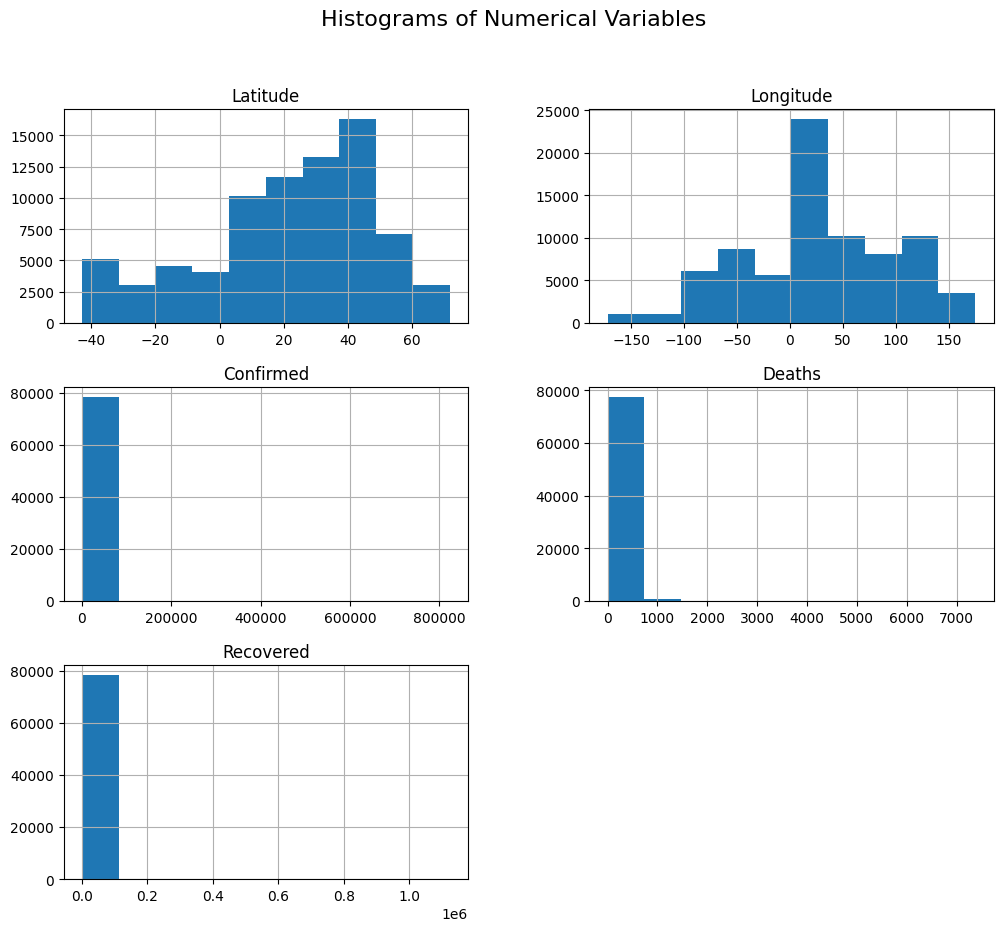

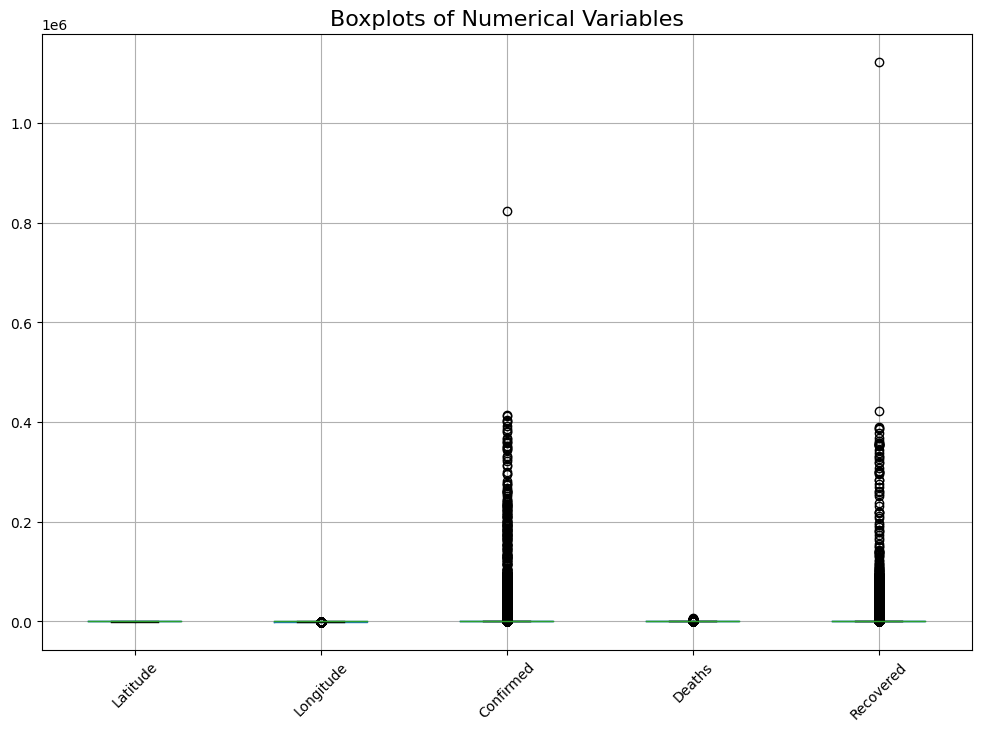

In [13]:
# Visualizing the distribution of numerical variables using histograms
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

# Visualizing boxplots for numerical variables
df.boxplot(figsize=(12, 8))
plt.title("Boxplots of Numerical Variables", fontsize=16)
plt.xticks(rotation=45)
plt.show()


5. Correlation Analysis:


Province           object
Country/Region     object
Latitude          float64
Longitude         float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object


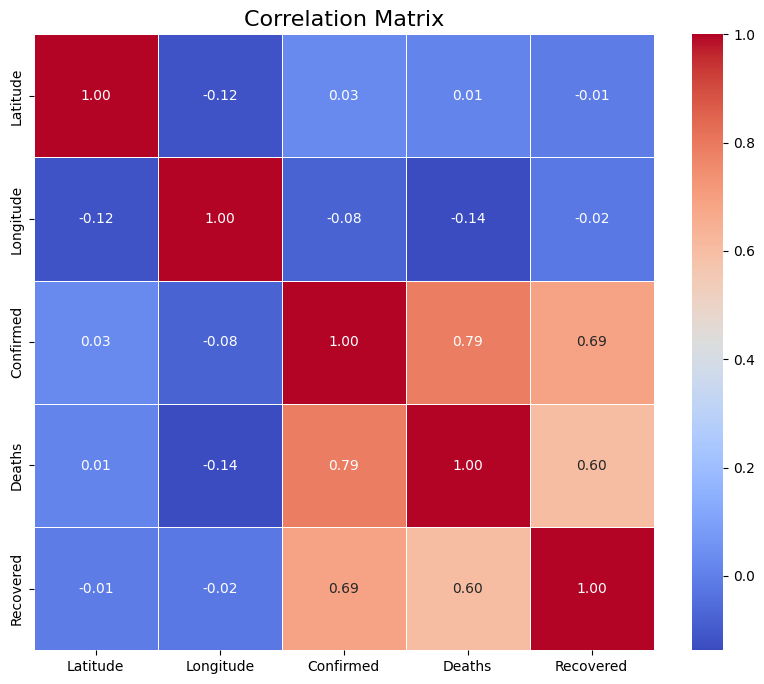

In [14]:
# Check data types of columns
print(df.dtypes)

# Drop non-numeric columns (if necessary)
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Perform data imputation to handle missing values in the DataFrame.

In [17]:
# Mean imputation for numerical columns
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)

# Alternatively, you can use the fillna method with the mean of the column directly
# data.fillna(data.mean(), inplace=True)

# Display the DataFrame after imputation
print(df)

          Province Country/Region   Latitude  Longitude        Date  \
0      Afghanistan    Afghanistan  33.939110  67.709953  22-01-2020   
1      Afghanistan    Afghanistan  33.939110  67.709953  23-01-2020   
2      Afghanistan    Afghanistan  33.939110  67.709953  24-01-2020   
3      Afghanistan    Afghanistan  33.939110  67.709953  25-01-2020   
4      Afghanistan    Afghanistan  33.939110  67.709953  26-01-2020   
...            ...            ...        ...        ...         ...   
78381     Zimbabwe       Zimbabwe -19.015438  29.154857  09-06-2021   
78382     Zimbabwe       Zimbabwe -19.015438  29.154857  10-06-2021   
78383     Zimbabwe       Zimbabwe -19.015438  29.154857  11-06-2021   
78384     Zimbabwe       Zimbabwe -19.015438  29.154857  12-06-2021   
78385     Zimbabwe       Zimbabwe -19.015438  29.154857  13-06-2021   

       Confirmed  Deaths  Recovered  
0              0       0          0  
1              0       0          0  
2              0       0         

Define a helper function to run SQL queries and display the results.

In [3]:
def run_query(query):
    return pd.read_sql_query(query, conn)


Q1: Check NULL values



In [ ]:
query = """
SELECT COUNT(*) - COUNT(column_name) AS null_values, 'column_name' AS column
FROM covid_data
GROUP BY column_name;
"""
run_query(query)


Q2: Update NULL values with zeros for all columns



In [ ]:
query = """
UPDATE covid_data
SET Confirmed = IFNULL(Confirmed, 0),
    Deaths = IFNULL(Deaths, 0),
    Recovered = IFNULL(Recovered, 0);
"""
conn.execute(query)


Q3: Check total number of rows



In [ ]:
query = "SELECT COUNT(*) AS total_rows FROM covid_data;"
run_query(query)


Q4: Check start_date and end_date



In [ ]:
query = "SELECT MIN(Date) AS start_date, MAX(Date) AS end_date FROM covid_data;"
run_query(query)


Q5: Number of months present in the dataset



In [ ]:
query = "SELECT COUNT(DISTINCT strftime('%Y-%m', Date)) AS months FROM covid_data;"
run_query(query)


Q6: Find monthly average for confirmed, deaths, recovered



In [ ]:
query = """
SELECT strftime('%Y-%m', Date) AS month,
       AVG(Confirmed) AS avg_confirmed,
       AVG(Deaths) AS avg_deaths,
       AVG(Recovered) AS avg_recovered
FROM covid_data
GROUP BY month;
"""
run_query(query)


Q7: Find most frequent value for confirmed, deaths, recovered each month



In [ ]:
query = """
SELECT month, value_type, value
FROM (
    SELECT month, 'Confirmed' AS value_type, Confirmed AS value,
           ROW_NUMBER() OVER (PARTITION BY month ORDER BY COUNT(*) DESC) AS rank
    FROM (SELECT strftime('%Y-%m', Date) AS month, Confirmed FROM covid_data)
    GROUP BY month, Confirmed
    UNION ALL
    SELECT month, 'Deaths', Deaths,
           ROW_NUMBER() OVER (PARTITION BY month ORDER BY COUNT(*) DESC) AS rank
    FROM (SELECT strftime('%Y-%m', Date) AS month, Deaths FROM covid_data)
    GROUP BY month, Deaths
    UNION ALL
    SELECT month, 'Recovered', Recovered,
           ROW_NUMBER() OVER (PARTITION BY month ORDER BY COUNT(*) DESC) AS rank
    FROM (SELECT strftime('%Y-%m', Date) AS month, Recovered FROM covid_data)
    GROUP BY month, Recovered
)
WHERE rank = 1;
"""
run_query(query)


Q8: Find minimum values for confirmed, deaths, recovered per year



In [ ]:
query = """
SELECT strftime('%Y', Date) AS year,
       MIN(Confirmed) AS min_confirmed,
       MIN(Deaths) AS min_deaths,
       MIN(Recovered) AS min_recovered
FROM covid_data
GROUP BY year;
"""
run_query(query)


Q9: Find maximum values of confirmed, deaths, recovered per year



In [ ]:
query = """
SELECT strftime('%Y', Date) AS year,
       MAX(Confirmed) AS max_confirmed,
       MAX(Deaths) AS max_deaths,
       MAX(Recovered) AS max_recovered
FROM covid_data
GROUP BY year;
"""
run_query(query)


Q10: Total number of cases of confirmed, deaths, recovered each month



In [ ]:
query = """
SELECT strftime('%Y-%m', Date) AS month,
       SUM(Confirmed) AS total_confirmed,
       SUM(Deaths) AS total_deaths,
       SUM(Recovered) AS total_recovered
FROM covid_data
GROUP BY month;
"""
run_query(query)


Q11: Spread of coronavirus with respect to confirmed cases



In [ ]:
query = """
SELECT SUM(Confirmed) AS total_confirmed,
       AVG(Confirmed) AS avg_confirmed,
       VARIANCE(Confirmed) AS var_confirmed,
       STDEV(Confirmed) AS stddev_confirmed
FROM covid_data;
"""
run_query(query)


Q12: Spread of coronavirus with respect to death cases per month



In [ ]:
query = """
SELECT strftime('%Y-%m', Date) AS month,
       SUM(Deaths) AS total_deaths,
       AVG(Deaths) AS avg_deaths,
       VARIANCE(Deaths) AS var_deaths,
       STDEV(Deaths) AS stddev_deaths
FROM covid_data
GROUP BY month;
"""
run_query(query)


Q13: Spread of coronavirus with respect to recovered cases



In [ ]:
query = """
SELECT SUM(Recovered) AS total_recovered,
       AVG(Recovered) AS avg_recovered,
       VARIANCE(Recovered) AS var_recovered,
       STDEV(Recovered) AS stddev_recovered
FROM covid_data;
"""
run_query(query)


Q14: Country having highest number of confirmed cases



In [ ]:
query = """
SELECT Country, SUM(Confirmed) AS total_confirmed
FROM covid_data
GROUP BY Country
ORDER BY total_confirmed DESC
LIMIT 1;
"""
run_query(query)


Q15: Country having lowest number of death cases

